# Analysis of Reinforcement Learning Training Results
This notebook analyzes the training performance of the PPO agent in the 3D Grid World environment. It visualizes the learning curves for reward and episode length based on data from multiple training runs.


### 1. Import Necessary Libraries
First, we import the required libraries for data handling and plotting.
- `pandas` is used for data manipulation.
- `glob` helps in finding files matching a specific pattern.
- `seaborn` and `matplotlib.pyplot` are used for creating the plots.


In [6]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Find and Load Data from CSV Files
We'll search for all `progress.csv` files located in directories that match the pattern `log/ppo_grid_3d_10_500_*`. The data from these files will be loaded into a single pandas DataFrame.


In [7]:
# Find all progress.csv files
path_pattern = 'log/ppo_grid_3d_10_500_*/progress.csv'
csv_files = glob.glob(path_pattern)

# Read and concatenate all CSV files into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
all_data = pd.concat(df_list, ignore_index=True)

print(f"Found and loaded {len(df_list)} files.")
print("Data head:")
print(all_data.head())


Found and loaded 7 files.
Data head:
   time/total_timesteps  time/iterations  rollout/ep_rew_mean  \
0                  2048                1            -0.500000   
1                  4096                2            -0.555556   
2                  6144                3            -0.692308   
3                  8192                4            -0.444444   
4                 10240                5            -0.565217   

   rollout/ep_len_mean  time/fps  time/time_elapsed  train/explained_variance  \
0           426.250000      2510                  0                       NaN   
1           440.000000      1502                  2                  0.528224   
2           458.461538      1433                  4                  0.246203   
3           427.777778      1308                  6                  0.525752   
4           443.478261      1315                  7                  0.479777   

   train/n_updates  train/entropy_loss  train/approx_kl  train/loss  \
0             

### 3. Plot Time Steps vs. Mean Reward
Here, we create a plot to visualize the `rollout/ep_rew_mean` against `time/total_timesteps`. `seaborn.lineplot` automatically aggregates the data from multiple runs, showing the mean trend and the variance as a confidence interval.


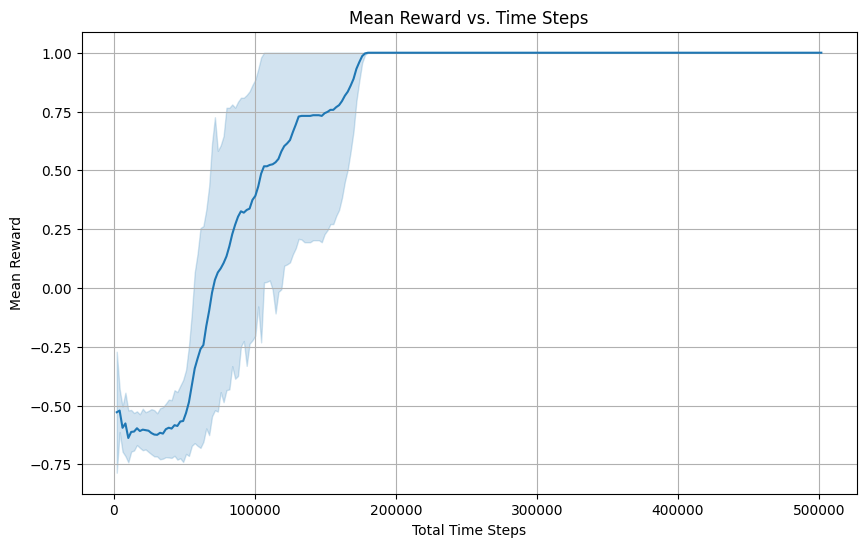

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_rew_mean')
plt.title('Mean Reward vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()


### 4. Plot Time Steps vs. Mean Episode Length
Next, we plot the `rollout/ep_len_mean` against `time/total_timesteps`. This shows how the average episode length changes as the agent learns.


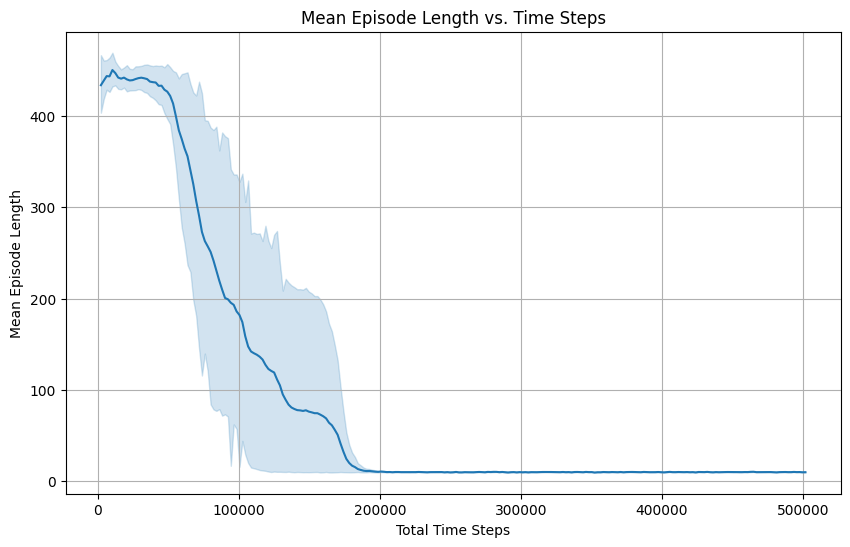

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_len_mean')
plt.title('Mean Episode Length vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Episode Length')
plt.grid(True)
plt.show()
